# Classifying Hand Signs
We will be working on a very cool problem which is classifying hand signs. In each image the hand is holding certain number of fingers up. The number of fingers held by the hand is the class number. The original dataset is in a format call h5 format. It is an efficient format to store and organize large amounts of data. [Click here to read more about it](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). The following function `load_dataset()` is ready for you to use. It will return four variables in the following order: X_train, Y_train, X_test, Y_test. Hence, your data is already splitted and there is no need for you to split it.

You can download the training datafile here https://drive.google.com/open?id=1vcbjJMj4RuuuqayUu40ScHJdSY4DZOrj

You can download the test datafile here https://drive.google.com/open?id=1rQ1RCIBzw7ho_n6x0vbMzdZ8fAzi1hIQ

Make sure you have both on the same directory as your notebook

In [1]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig


load the dataset 

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

Generate 20 random numbers between 0 and the length of the training dataset. Plot 20 images from the dataset using these 20 random numbers as indicies to the training dataset. You will need to plot them on 5 rows and 4 columns. In addition, each image will have a title that says `this image belons to class number X`, replace X by the correct class number from the training labels.

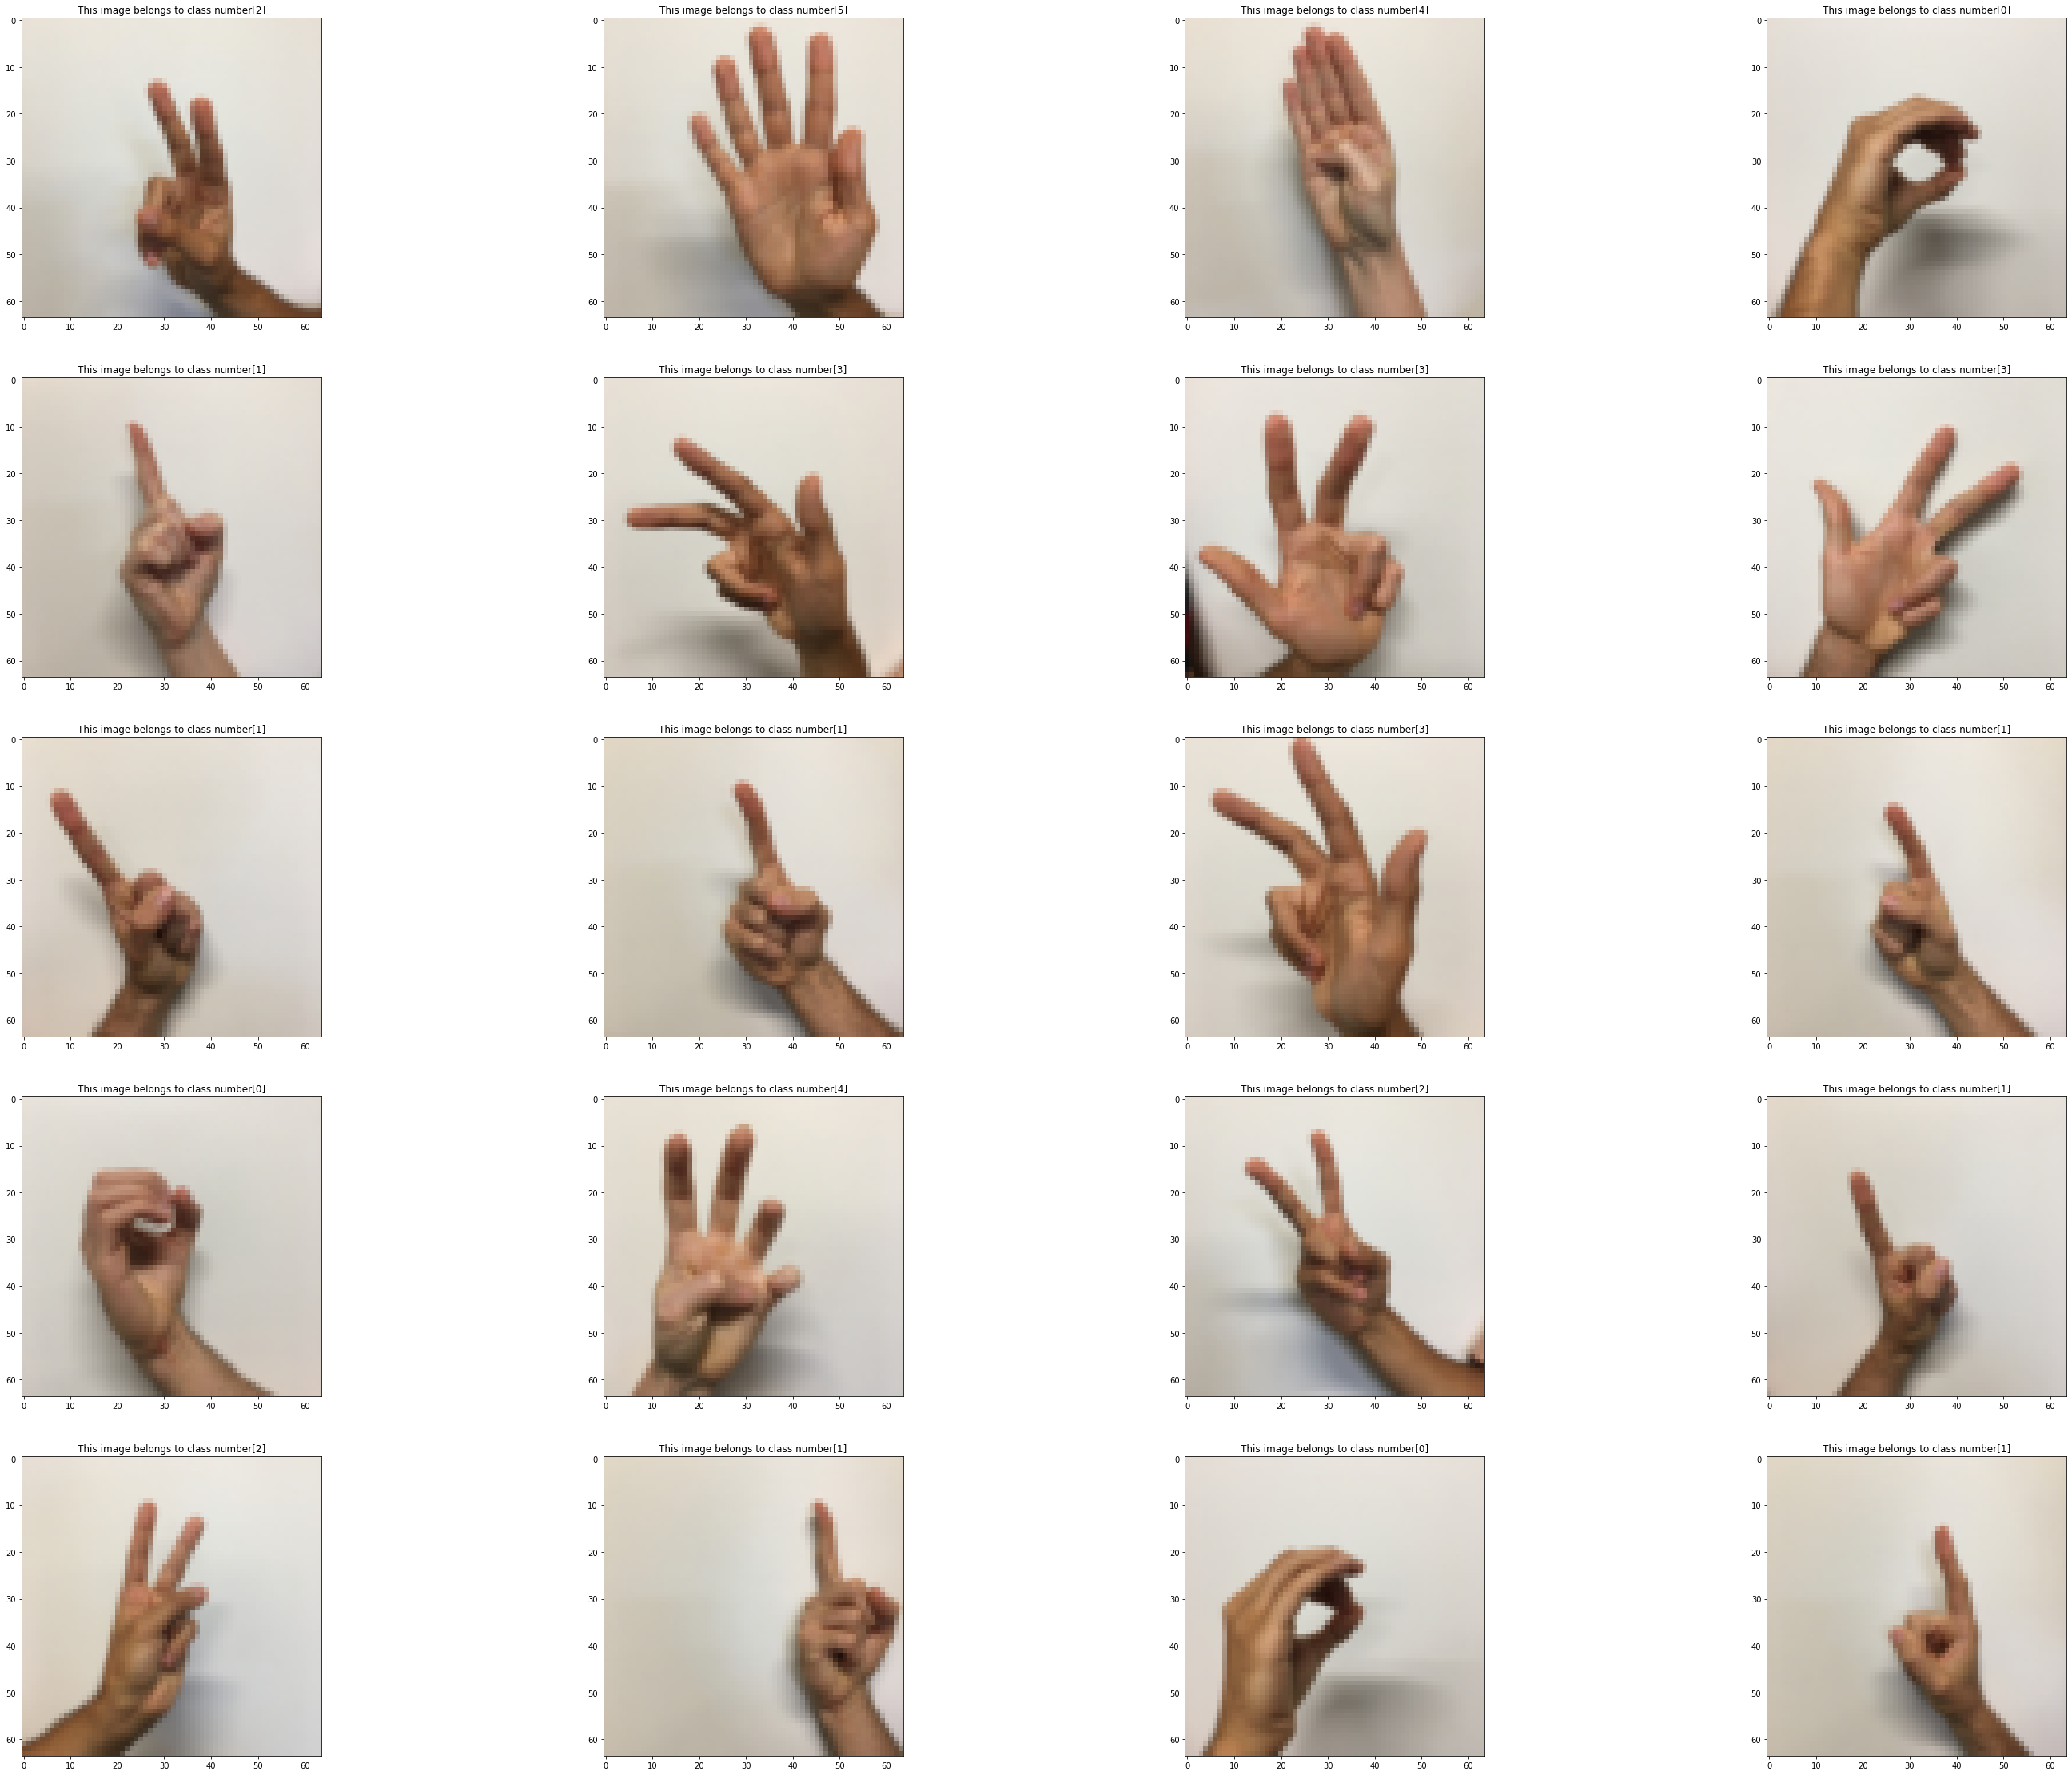

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

rand = np.random.randint(low=0, high=len(X_train_orig)-1, size = 20).tolist()
plt.figure(figsize=(50, 40))

# loop to pick one number from the list and subplot it on its index. 
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(X_train_orig[i])
    plt.title('This image belongs to class number{}'.format(Y_train_orig[i]))


How many classes does the training and test dataset have?

In [4]:
print("Number of classes in the training dataset:", len(np.unique(Y_train_orig)))
print("Number of classes in the Test dataset:", len(np.unique(Y_test_orig)))

Number of classes in the training dataset: 6
Number of classes in the Test dataset: 6


What is the dimension of the training dataset and test dataset?

In [5]:
print("Shape of training dataset:", X_train_orig.shape)
print("Shape of test dataset:",X_test_orig.shape)

Shape of training dataset: (1080, 64, 64, 3)
Shape of test dataset: (120, 64, 64, 3)


Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by its max. That will produce a normalized image datasets

In [6]:
X_train_orig = X_train_orig / 255
print("Normalized Train dataset:")
X_train_orig

X_test_orig = X_test_orig/ 255
print("Normalized test dataset:")
X_test_orig

Normalized Train dataset:
Normalized test dataset:


array([[[[0.90588235, 0.87843137, 0.84705882],
         [0.90980392, 0.87843137, 0.84705882],
         [0.90980392, 0.88235294, 0.85098039],
         ...,
         [0.88627451, 0.85490196, 0.82352941],
         [0.88627451, 0.85098039, 0.81960784],
         [0.88235294, 0.84705882, 0.81568627]],

        [[0.90588235, 0.87843137, 0.84313725],
         [0.90980392, 0.87843137, 0.84313725],
         [0.90588235, 0.88235294, 0.84705882],
         ...,
         [0.88627451, 0.85490196, 0.82352941],
         [0.88235294, 0.85098039, 0.81960784],
         [0.87843137, 0.84705882, 0.81568627]],

        [[0.90588235, 0.8745098 , 0.84313725],
         [0.90588235, 0.87843137, 0.84313725],
         [0.90588235, 0.87843137, 0.84705882],
         ...,
         [0.88235294, 0.85490196, 0.81960784],
         [0.88235294, 0.85490196, 0.81960784],
         [0.87843137, 0.85098039, 0.81568627]],

        ...,

        [[0.78823529, 0.75686275, 0.7254902 ],
         [0.78823529, 0.75686275, 0.7254902 ]

## Build a Baseline Model

As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [7]:
X_train = X_train_orig.flatten().reshape(1080, -1)
X_test = X_test_orig.flatten().reshape(120, -1)

print("X_Train", X_train)
print('X_Test', X_test)

X_Train [[0.89019608 0.8627451  0.83921569 ... 0.81568627 0.81960784 0.81960784]
 [0.93333333 0.90980392 0.8745098  ... 0.84313725 0.8        0.75294118]
 [0.89411765 0.8627451  0.81568627 ... 0.82745098 0.81176471 0.79215686]
 ...
 [0.92156863 0.88627451 0.84705882 ... 0.78431373 0.75294118 0.71372549]
 [0.91372549 0.88627451 0.85098039 ... 0.8        0.78823529 0.77647059]
 [0.90196078 0.8627451  0.81960784 ... 0.79215686 0.78039216 0.77254902]]
X_Test [[0.90588235 0.87843137 0.84705882 ... 0.85098039 0.8        0.75686275]
 [0.90588235 0.8745098  0.84313725 ... 0.69019608 0.62352941 0.56470588]
 [0.90196078 0.87843137 0.84705882 ... 0.81960784 0.77647059 0.73333333]
 ...
 [0.90980392 0.8745098  0.83137255 ... 0.49019608 0.3372549  0.24705882]
 [0.90196078 0.87058824 0.83137255 ... 0.41176471 0.25882353 0.16862745]
 [0.90196078 0.87058824 0.83137255 ... 0.8        0.74901961 0.68627451]]


Now you can apply some old fashion ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [8]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression( max_iter = 500)
mod.fit(X_train, Y_train_orig) 

/Users/fjacobo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fjacobo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fjacobo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from sklearn.metrics import confusion_matrix 
print('Training accuracy score:', mod.score(X_train, Y_train_orig))
print('Test accuracy score:', mod.score(X_test, Y_test_orig))
print('Test cm is \n', confusion_matrix(Y_test_orig, mod.predict(X_test)))

Training accuracy score: 1.0
Test accuracy score: 0.8916666666666667
Test cm is 
 [[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  1 18  1  0  0]
 [ 1  0  0 18  0  1]
 [ 0  0  2  1 14  3]
 [ 0  0  1  1  1 17]]


# Build a DNN 
Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `SparseCategoricalCrossentropy`. Notice that, we already have a flattening layer in DNN, so you can actually use the normalized image without the flattening step that you have done earlier when you were building logistic regression

In [10]:
# Solve Here
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(Flatten(input_shape= X_train_orig.shape[1:]))
model.add(Dense(25, activation = "relu"))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(6,activation = 'softmax'))
# Compile the model  optimizer ='adam',
model.compile(loss ='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics= ['accuracy']) 

In [11]:
model.fit(X_train_orig, Y_train_orig, epochs = 500, batch_size = 100,  
          validation_data= (X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 0s 18ms/step - loss: 3.7873 - accuracy: 0.1731 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 8/500


### Learning Rate Optimizing
Did you notice that the it was not or learning was a little slow at the beginning? That is because of the keras learning rate is being high by default. Let's play around with the learning rate to give the DNN more change to learn. Change the compiling line for the model to `model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy?

In [12]:
model1 = Sequential()
model1.add(Flatten(input_shape = X_train_orig.shape[1:]))
model1.add(Dense(25, activation= 'relu'))
model1.add(Dense(12, activation= 'relu'))
model1.add(Dense(12, activation= 'relu'))
model1.add(Dense(10, activation= 'relu'))
model1.add(Dense(6, activation= 'softmax'))
# Compile the model
model1.compile(loss= "SparseCategoricalCrossentropy", optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [13]:
model1.fit(X_train_orig, Y_train_orig, epochs = 500, batch_size=100, validation_data = (X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 0s 15ms/step - loss: 1.7854 - accuracy: 0.1972 - val_loss: 1.7773 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 0s 8ms/step - loss: 1.7805 - accuracy: 0.1676 - val_loss: 1.7703 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 0s 8ms/step - loss: 1.7590 - accuracy: 0.2130 - val_loss: 1.7494 - val_accuracy: 0.2083
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7497 - accuracy: 0.2111 - val_loss: 1.7393 - val_accuracy: 0.2500
Epoch 5/500
11/11 [==============================] - 0s 8ms/step - loss: 1.7428 - accuracy: 0.2222 - val_loss: 1.7593 - val_accuracy: 0.1667
Epoch 6/500
11/11 [==============================] - 0s 8ms/step - loss: 1.7435 - accuracy: 0.2102 - val_loss: 1.7303 - val_accuracy: 0.2000
Epoch 7/500
11/11 [==============================] - 0s 8ms/step - loss: 1.7203 - accuracy: 0.2167 - val_loss: 1.7193 - val_accuracy: 0.1917
Epoch 8/500


Given the learning rate used in the previous part, Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 100 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy?

In [14]:
model2 = Sequential()
model2.add(Flatten(input_shape = X_train_orig.shape[1:]))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dense(150, activation = 'relu'))
model2.add(Dense(150, activation = 'relu'))
model2.add(Dense(150, activation = 'relu'))
model2.add(Dense(90, activation = 'relu'))
model2.add(Dense(6, activation = 'softmax'))
# Compile the Model
model2.compile(loss= "SparseCategoricalCrossentropy", optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [15]:
model2.fit(X_train_orig, Y_train_orig, epochs = 500, batch_size=100, validation_data = (X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 1s 57ms/step - loss: 4.1806 - accuracy: 0.1981 - val_loss: 2.4506 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 1s 50ms/step - loss: 2.0829 - accuracy: 0.1741 - val_loss: 1.8254 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 1s 48ms/step - loss: 1.8630 - accuracy: 0.1713 - val_loss: 1.8230 - val_accuracy: 0.1667
Epoch 4/500
11/11 [==============================] - 1s 47ms/step - loss: 1.8880 - accuracy: 0.1704 - val_loss: 1.8683 - val_accuracy: 0.1667
Epoch 5/500
11/11 [==============================] - 1s 48ms/step - loss: 1.8231 - accuracy: 0.1833 - val_loss: 1.7835 - val_accuracy: 0.2333
Epoch 6/500
11/11 [==============================] - 1s 48ms/step - loss: 1.8456 - accuracy: 0.1713 - val_loss: 1.8166 - val_accuracy: 0.1667
Epoch 7/500
11/11 [==============================] - 1s 48ms/step - loss: 1.7854 - accuracy: 0.2056 - val_loss: 1.7723 - val_accuracy: 0.1917
Epoch 

See if you can change some of the parameters so that some of the epochs can reach a validation accuracy of at least 92%

In [18]:
from tensorflow.keras import regularizers, layers, activations

model3 = Sequential()
model3.add(Flatten(input_shape = X_train_orig.shape[1:]))
model3.add(Dense(1200, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(1200, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(900, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(900, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(900, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(1800, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(700, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model3.add(Dense(6, kernel_regularizer = regularizers.l2(0.001), activation= 'softmax'))

# Compile the model
model3.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Nadam(lr=0.0000075), metrics=['accuracy'])

history = model3.fit(X_train_orig, Y_train_orig, epochs= 500, batch_size = 200, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
6/6 [==============================] - 2s 305ms/step - loss: 10.2146 - accuracy: 0.2102 - val_loss: 10.1916 - val_accuracy: 0.2000
Epoch 2/500
6/6 [==============================] - 2s 289ms/step - loss: 10.1790 - accuracy: 0.3241 - val_loss: 10.1615 - val_accuracy: 0.2167
Epoch 3/500
6/6 [==============================] - 2s 293ms/step - loss: 10.1484 - accuracy: 0.3213 - val_loss: 10.1318 - val_accuracy: 0.3083
Epoch 4/500
6/6 [==============================] - 2s 288ms/step - loss: 10.1169 - accuracy: 0.3648 - val_loss: 10.0971 - val_accuracy: 0.4083
Epoch 5/500
6/6 [==============================] - 2s 280ms/step - loss: 10.0819 - accuracy: 0.4463 - val_loss: 10.0640 - val_accuracy: 0.4250
Epoch 6/500
6/6 [==============================] - 2s 283ms/step - loss: 10.0461 - accuracy: 0.4139 - val_loss: 10.0476 - val_accuracy: 0.2500
Epoch 7/500
6/6 [==============================] - 2s 286ms/step - loss: 10.0141 - accuracy: 0.4250 - val_loss: 9.9943 - val_accuracy: 0.3917


In [19]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 1200)              14746800  
_________________________________________________________________
dense_26 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
dense_27 (Dense)             (None, 900)               1080900   
_________________________________________________________________
dense_28 (Dense)             (None, 900)               810900    
_________________________________________________________________
dense_29 (Dense)             (None, 900)               810900    
_________________________________________________________________
dense_30 (Dense)             (None, 1800)             